In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [5]:
df['Age'].fillna(df['Age'].mean())


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0])


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


<Axes: xlabel='Survived', ylabel='count'>

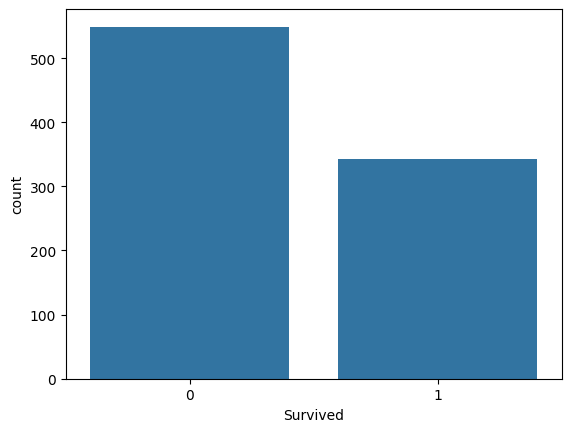

In [8]:
sns.countplot(data=df, x='Survived')


<Axes: xlabel='Sex', ylabel='Survived'>

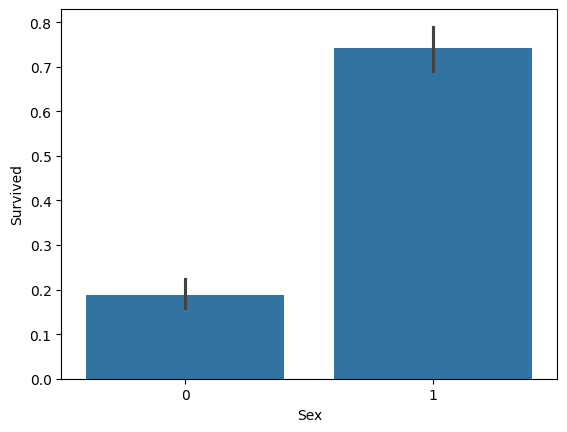

In [9]:
sns.barplot(x='Sex', y='Survived', data=df)


In [10]:
X = df.drop('Survived', axis=1)
y = df['Survived']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [15]:
# Double-check and fix missing 'Embarked' values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Confirm it's fixed
print(df.isnull().sum())  # Should all be 0


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [18]:
# Fix missing 'Age' values
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fix missing 'Embarked' values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fix missing 'Fare' just in case (rarely needed)
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

# ✅ Confirm everything is now fixed
print(df.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [25]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [26]:
# Predict
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7318435754189944
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       105
           1       0.77      0.50      0.61        74

    accuracy                           0.73       179
   macro avg       0.74      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179

